# Outliers

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [10]:
df.shape

(305, 4)

In [11]:
df.columns =  ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [12]:
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [14]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [15]:
df.isnull().sum()

patient_age                0
operation_year             0
positive_axillary_nodes    0
survival_status            0
dtype: int64

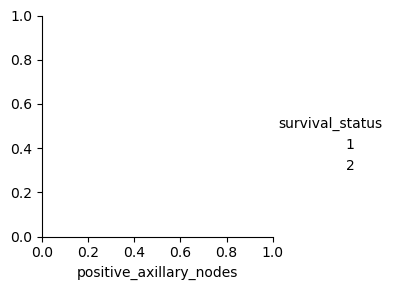

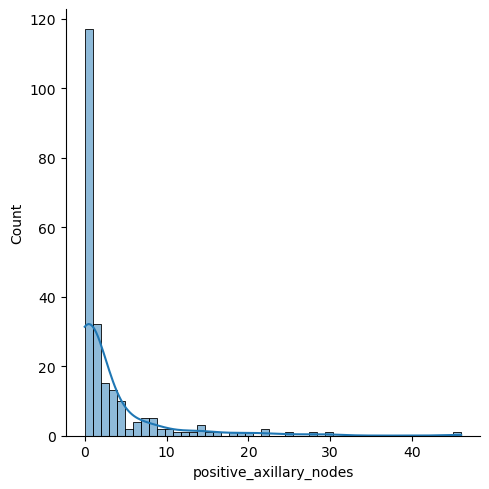

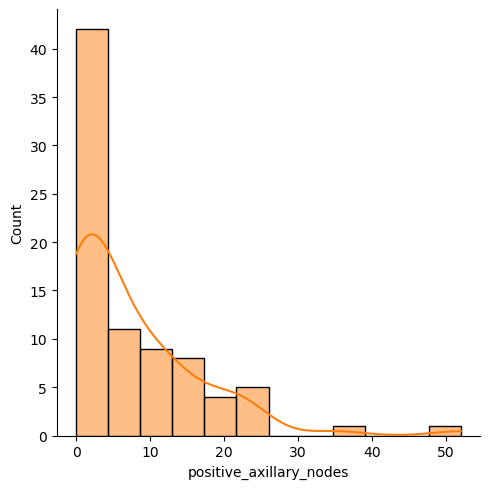

<Figure size 1200x800 with 0 Axes>

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    g = sns.FacetGrid(df , hue = 'survival_status')
    g.map(sns.displot, "positive_axillary_nodes", kde=True)
    g.add_legend()
    plt.figure(figsize=(12,8))
    plt.show()
    
    

# Detecting outliers

# Z-Score

In [18]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return z_scores > threshold
print(np.where(detect_outliers_zscore(df["positive_axillary_nodes"]))[0])

[  8  61 173 214 251]


In [20]:
df.columns

Index(['patient_age', 'operation_year', 'positive_axillary_nodes',
       'survival_status'],
      dtype='object')

# Box Plot 

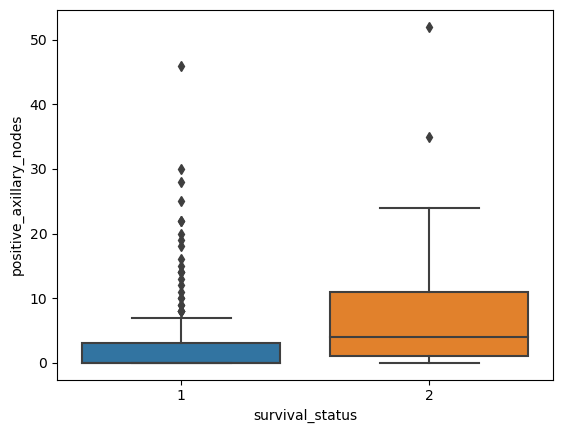

In [21]:
sns.boxplot(x='survival_status',data=df,y='positive_axillary_nodes')
plt.show()

# IQR Method

In [22]:
def detect_outliers_iqr(data, threshold=1.5):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    return (data < Q1 - threshold * IQR) | (data > Q3 + threshold * IQR)
print(np.where(detect_outliers_iqr(df["positive_axillary_nodes"]))[0])

[  8  13  21  23  30  42  58  61  65  74  78  84  91  95 105 106 107 123
 135 159 160 166 167 173 176 180 184 187 197 214 222 226 237 239 251 253
 259 260 268 286]


# Remove outliers

# imputation

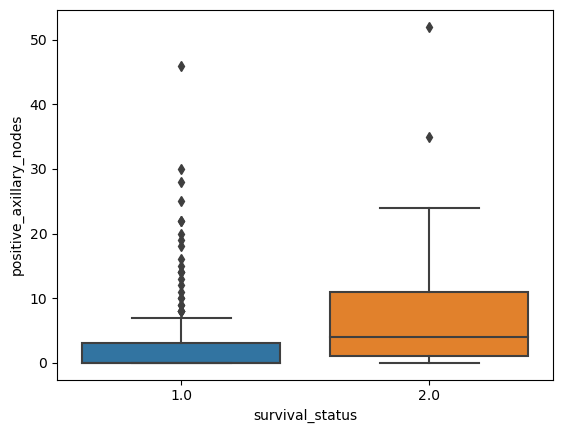

In [23]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df)
colum=['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
imputed_df = pd.DataFrame(imputed_data, columns=colum)
sns.boxplot(x = 'survival_status', y = 'positive_axillary_nodes', data = imputed_df) 
plt.show()

In [24]:
imputed_df

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30.0,62.0,3.0,1.0
1,30.0,65.0,0.0,1.0
2,31.0,59.0,2.0,1.0
3,31.0,65.0,4.0,1.0
4,33.0,58.0,10.0,1.0
...,...,...,...,...
300,75.0,62.0,1.0,1.0
301,76.0,67.0,0.0,1.0
302,77.0,65.0,3.0,1.0
303,78.0,65.0,1.0,2.0


In [25]:
imputed_data

array([[30., 62.,  3.,  1.],
       [30., 65.,  0.,  1.],
       [31., 59.,  2.,  1.],
       ...,
       [77., 65.,  3.,  1.],
       [78., 65.,  1.,  2.],
       [83., 58.,  2.,  2.]])

# winsorize

Winsorized Data:
[ 3  0  2  4 10  0  0  9 20  1 10  7  0 13  0  1  0  0  0  0  6 15  0 20
  2  0  0  3  1  0 11  1  5  0  0  0  0  2  4  2  0  0 20  0  0  0  8  0
  0  8  0  0  1  0  0  1  2  4 20  0  1 20  2  0  0 14  2  3  0  2  0  4
  6  9 19  0  1  0 16  6  0  1  0  0 14  0  0  1  2  3  5 20  0  3  0 20
  0  0  0  6  0  0  3  4  4 12 11 11  7  8  2  0  0  0 10  1  0  0  1  1
  3  0  1 13  0  0  6  0  1  1  2  0  0  4  1 13  3  7  1  0  1  3  2  3
  4  0  4  0  4  5  0  1  0  0  0  4  1  3  9 20 12  1  1  2  1  0 11 20
  5  7  7  3  0 20  0  7 19  1  0  6 15  1  0  1 18  0  3 20  1  9  3  0
  2  1  0  0  5 14  1  9  0  0  0  0  0  0  0  0  3  1  0  0  3  2 20  0
  0  1  4  0  7  3 17  0  1  2 20  0  5  0  1  0  0  0  8  0  0 13  0 19
  6  0  0  0  1  0  0  0  0  0  9 20  0 20  0  0  0  0  2 20 15  0  0  0
  2  0  1  0 13  0  1  0  8  1  0  0  0  0  0  0  8  0  0  0  0  4 14  0
  0  8  0  2  0  0  0  3  0  0  3  0  1  0  3  1  2]


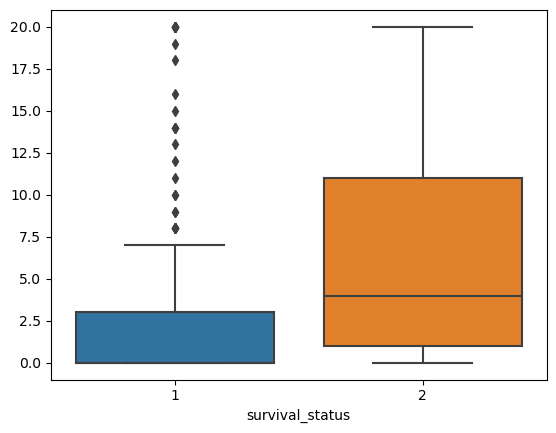

[]


In [28]:
from scipy.stats.mstats import winsorize

winsorized_data = winsorize(df['positive_axillary_nodes'], limits=[0.05, 0.05])

print("Winsorized Data:")
print(winsorized_data)

sns.boxplot(x = 'survival_status', y =winsorized_data, data = df) 
plt.show()

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    return z_scores > threshold
print(np.where(detect_outliers_zscore(winsorized_data))[0])

Trimmed Data:
     patient_age  operation_year  positive_axillary_nodes  survival_status
0           30.0            62.0                      3.0                1
1           30.0            65.0                      NaN                1
2           31.0            59.0                      2.0                1
3           31.0            65.0                      4.0                1
4           33.0            58.0                     10.0                1
..           ...             ...                      ...              ...
300          NaN            62.0                      1.0                1
301          NaN             NaN                      NaN                1
302          NaN            65.0                      3.0                1
303          NaN            65.0                      1.0                2
304          NaN            58.0                      2.0                2

[305 rows x 4 columns]


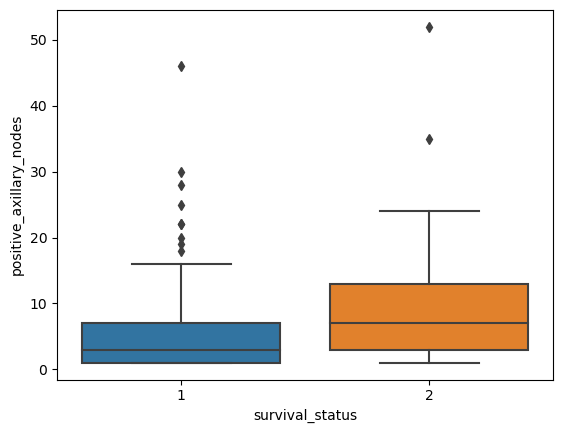

In [29]:
trimmed_data = df[(df > np.percentile(df, 5)) & (df < np.percentile(df, 95))]

print("Trimmed Data:")
print(trimmed_data)
sns.boxplot(x = 'survival_status', y ="positive_axillary_nodes", data = trimmed_data) 
plt.show()

In [31]:
np.random.seed(0)
data = np.random.gamma(2, scale=2, size=1000)

In [32]:
df = pd.DataFrame(data, columns=['Value'])

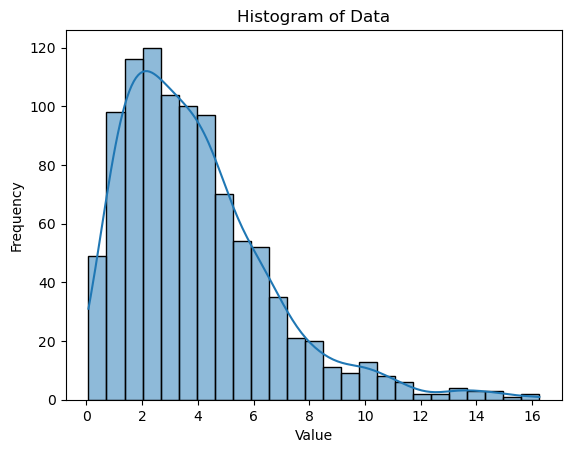

In [33]:
sns.histplot(df['Value'], kde=True)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# skewness and kurtosis

In [35]:
from scipy.stats import skew, kurtosis
from scipy.stats import boxcox

In [36]:
skewness = skew(df['Value'])
kurt = kurtosis(df['Value'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 1.358332294792333
Kurtosis: 2.4079180806130145


In [37]:
transformed_data, lambda_value = boxcox(df['Value'])
print("Lambda value for Box-Cox transformation:", lambda_value)

Lambda value for Box-Cox transformation: 0.2939653369901714


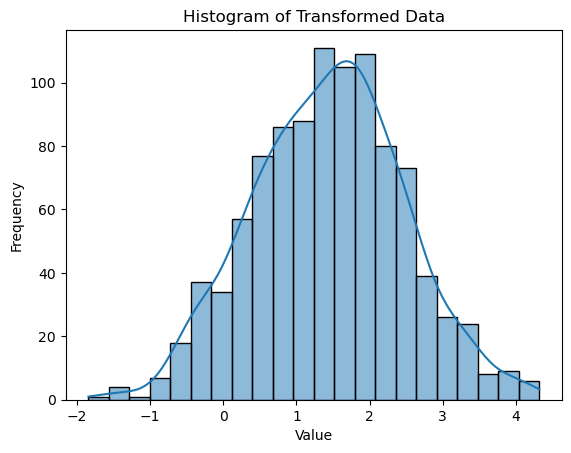

In [38]:
sns.histplot(transformed_data, kde=True)
plt.title('Histogram of Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Re-calculate skewness and kurtosis after transformation
skewness_transformed = skew(transformed_data)
kurt_transformed = kurtosis(transformed_data)

print("Skewness after transformation:", skewness_transformed)
print("Kurtosis after transformation:", kurt_transformed)

Skewness after transformation: -0.011599329825676557
Kurtosis after transformation: -0.1361849439120264
